In [79]:
#Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import for Scaling
from sklearn.preprocessing import StandardScaler


# Importing all the Algorithm Required
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Importing Silhoute Score
from sklearn.metrics import silhouette_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
data  = pd.read_csv("USArrests.csv",index_col=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [82]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
scaled = pd.DataFrame(scaled,columns=data.columns,index= data.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. DBSCAN Clustering

In [84]:
clust = DBSCAN(eps = 1,min_samples=2)
clust.fit_predict(scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [85]:
scaled['Clust'] = clust.labels_
data_scl_inliners = scaled[scaled['Clust']!=-1]
print(silhouette_score(data_scl_inliners.iloc[:,:-1],
                      data_scl_inliners.iloc[:,-1]))

0.3395677965591881


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
score = []
for i in eps_range:
    for j in mp_range:
        clust = DBSCAN(eps = i,min_samples=j)
        clust.fit_predict(scaled)
        scaled['Clust'] = clust.labels_
        milk_scl_inliners = scaled[scaled['Clust']!=-1]
        n_cluster=data_scl_inliners['Clust'].nunique()
        if n_cluster<=1:
               print("Ignore ",i," ",j)
               # score.append((1111,i,j))
        else:
            sil =silhouette_score(data_scl_inliners.iloc[:,:-1],data_scl_inliners.iloc[:,-1])
            #print("Cluster")
            score.append([sil,i,j,n_cluster])
        milkedscaled = scaled.drop('Clust',axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.3395677965591881, 0.2, 2, 4],
 [0.3395677965591881, 0.2, 3, 4],
 [0.3395677965591881, 0.2, 4, 4],
 [0.3395677965591881, 0.2, 5, 4],
 [0.3395677965591881, 0.4, 2, 4],
 [0.3395677965591881, 0.4, 3, 4],
 [0.3395677965591881, 0.4, 4, 4],
 [0.3395677965591881, 0.4, 5, 4],
 [0.3395677965591881, 0.6, 2, 4],
 [0.3395677965591881, 0.6, 3, 4],
 [0.3395677965591881, 0.6, 4, 4],
 [0.3395677965591881, 0.6, 5, 4],
 [0.3395677965591881, 1, 2, 4],
 [0.3395677965591881, 1, 3, 4],
 [0.3395677965591881, 1, 4, 4],
 [0.3395677965591881, 1, 5, 4]]

In [89]:
df_res=pd.DataFrame(score,columns=['S_Score','es','mp_range','N_Clusters'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
df_res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,S_Score,es,mp_range,N_Clusters
0,0.339568,0.2,2,4
1,0.339568,0.2,3,4
2,0.339568,0.2,4,4
3,0.339568,0.2,5,4
4,0.339568,0.4,2,4
5,0.339568,0.4,3,4
6,0.339568,0.4,4,4
7,0.339568,0.4,5,4
8,0.339568,0.6,2,4
9,0.339568,0.6,3,4


In [91]:
clust = DBSCAN(eps = 0.4,min_samples=2)
clust.fit(scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DBSCAN(eps=0.4, min_samples=2)

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
print("Clustering label",clust.labels_)
print("silhoute score",silhouette_score(scaled,clust.labels_))

Clustering label [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
silhoute score -0.23772778782821558


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
PCs = pd.DataFrame({'PC1':pca_result[:, 0],'PC2':pca_result[:, 1],'Cluster':clust.labels_})
#PCs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


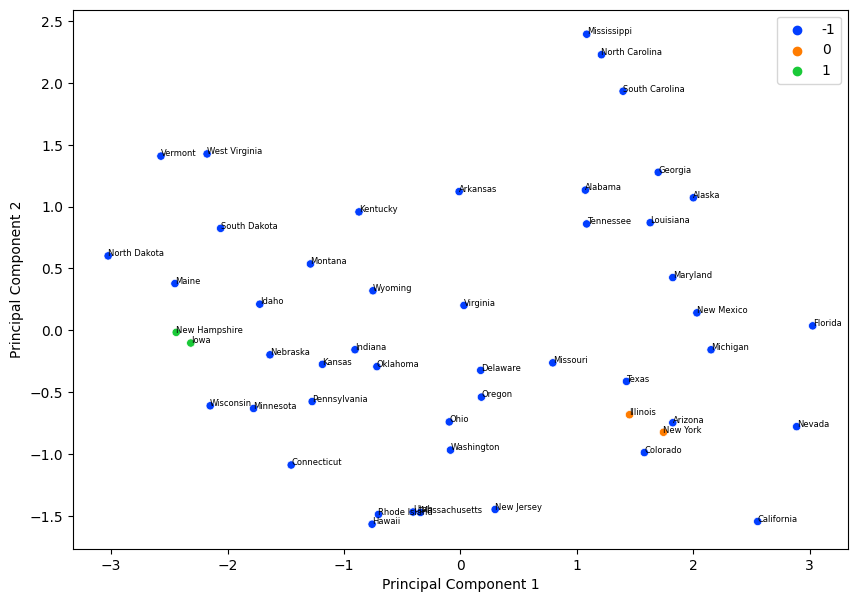

In [95]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], palette='bright',hue = clust.labels_)
for i in np.arange(0,data.shape[0]):
    plt.text(pca_result[i,0],pca_result[i,1],list(data.index)[i],fontsize=6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 2. Hierarchical Clustering

In [96]:
clustering = AgglomerativeClustering(n_clusters=4,
                                 linkage='average')
clust = clustering.fit(scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
print("Clustering label",clust.labels_)
print("silhoute score",silhouette_score(scaled,clust.labels_))

Clustering label [0 2 0 1 0 0 1 3 0 0 3 1 0 1 1 1 1 0 1 0 3 0 1 0 3 1 1 0 1 3 0 0 0 1 3 1 3
 1 3 0 1 0 0 3 1 3 3 1 1 1]
silhoute score 0.28012372809485664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


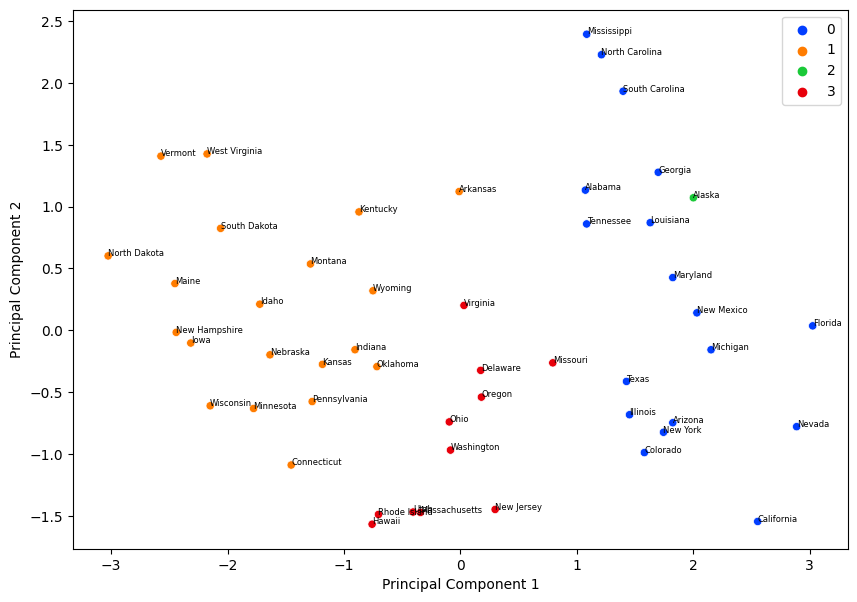

In [98]:
PCs = pd.DataFrame({'PC1':pca_result[:, 0],'PC2':pca_result[:, 1],'Cluster':clust.labels_})
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], palette='bright',hue = clust.labels_)
for i in np.arange(0,data.shape[0]):
    plt.text(pca_result[i,0],pca_result[i,1],list(data.index)[i],fontsize=6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Observation** -  There are 4 Cluster form and **Alaska** is in Seperate Cluter

### 3. k -Mean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

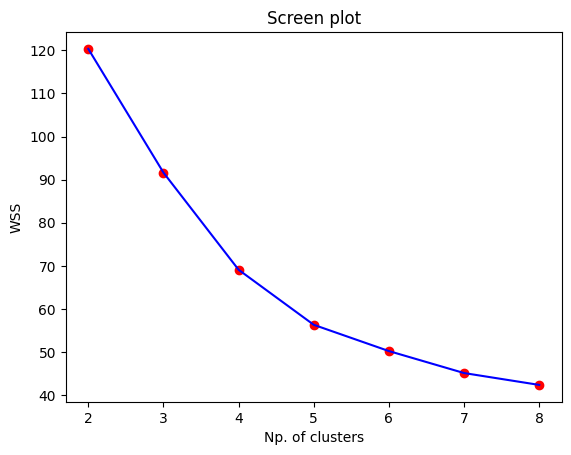

In [99]:
# Testing for the n number of Cluster
clust=[2,3,4,5,6,7,8]
scores=[]
for i in clust:
    km=KMeans(n_clusters=i, random_state=23)
    km.fit(scaled)
    scores.append(km.inertia_)
plt.scatter(clust,scores, c='red')
plt.plot(clust,scores, c='blue')
plt.title('Screen plot')
plt.xlabel('Np. of clusters')
plt.ylabel('WSS')
plt.show()

In [100]:
clust=KMeans(n_clusters=4, random_state=23)
clust.fit(scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=23)

In [101]:
print("Clustering label",clust.labels_)
print("silhoute score",silhouette_score(scaled,clust.labels_))

Clustering label [0 2 2 0 2 2 3 1 2 0 1 3 2 3 3 3 3 0 3 2 1 2 3 0 2 3 3 2 3 1 2 2 0 3 1 3 1
 3 1 0 3 0 2 1 3 1 1 3 3 3]
silhoute score 0.33878674962675853


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


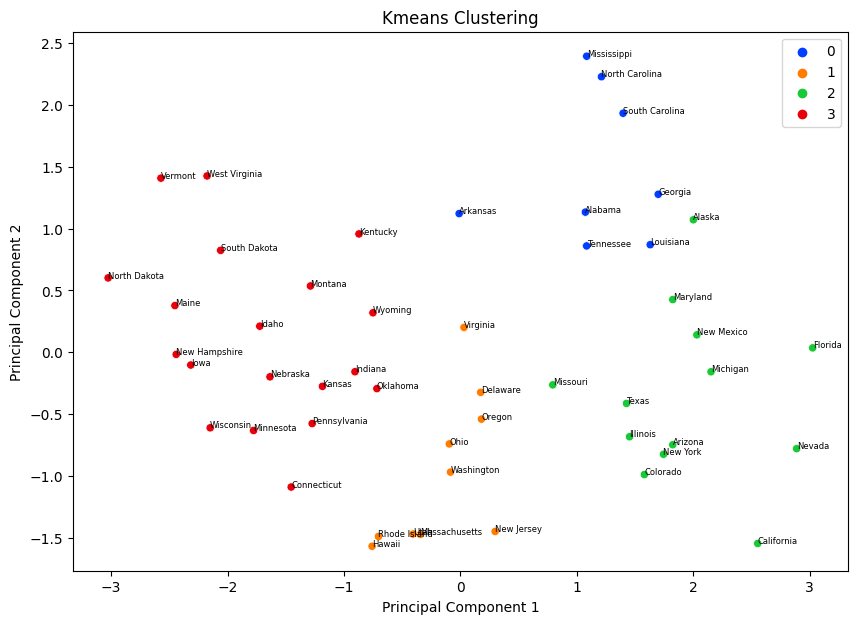

In [102]:
PCs = pd.DataFrame({'PC1':pca_result[:, 0],'PC2':pca_result[:, 1],'Cluster':clust.labels_})


plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], palette='bright',hue = clust.labels_)
for i in np.arange(0,data.shape[0]):
    plt.text(pca_result[i,0],pca_result[i,1],list(data.index)[i],fontsize=6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Kmeans Clustering")
plt.show()